# Maximum rainfall recorded by day, week, and month 

Some imports to provide the drop-down menus, and work with the data

In [1]:
%matplotlib notebook
import json
import pathlib

import ipywidgets as widgets
from IPython.display import display

from utils import aggregate_and_plot, load_data

Set up the path to the scraped CSV files, and then load the station details into `stations`

In [2]:
csv_directory = pathlib.Path('data/daily/csvs')

with open('data/stations.json', 'rt') as f:
    stations = json.load(f)

## User options

In [3]:
county = widgets.Dropdown(
    options=stations.keys(),
    value='Monaghan',
    description='County',
)
county

Dropdown(description='County', index=17, options=('Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Ga…

In [4]:
station = widgets.Dropdown(
    options=[s['station'] for s in stations[county.value]],
    description='Station',
    value='EMYVALE',
)
station

Dropdown(description='Station', index=3, options=('CARRICKMACROSS (DUNOGE)', 'CASTLEBLANEY_Coose', 'CLONES (DU…

In [5]:
timescale = widgets.RadioButtons(
    options=['day', 'week', 'month'],
    description='Timescale'
)
agg = widgets.RadioButtons(
    options=['max', 'mean'],
    description='Aggregation',
)

display(agg, timescale)

RadioButtons(description='Aggregation', options=('max', 'mean'), value='max')

RadioButtons(description='Timescale', options=('day', 'week', 'month'), value='day')

## Aggregate and plot the data

Historic data from: 1984–2005
Record high recorded 162 days in the past decade


<IPython.core.display.Javascript object>


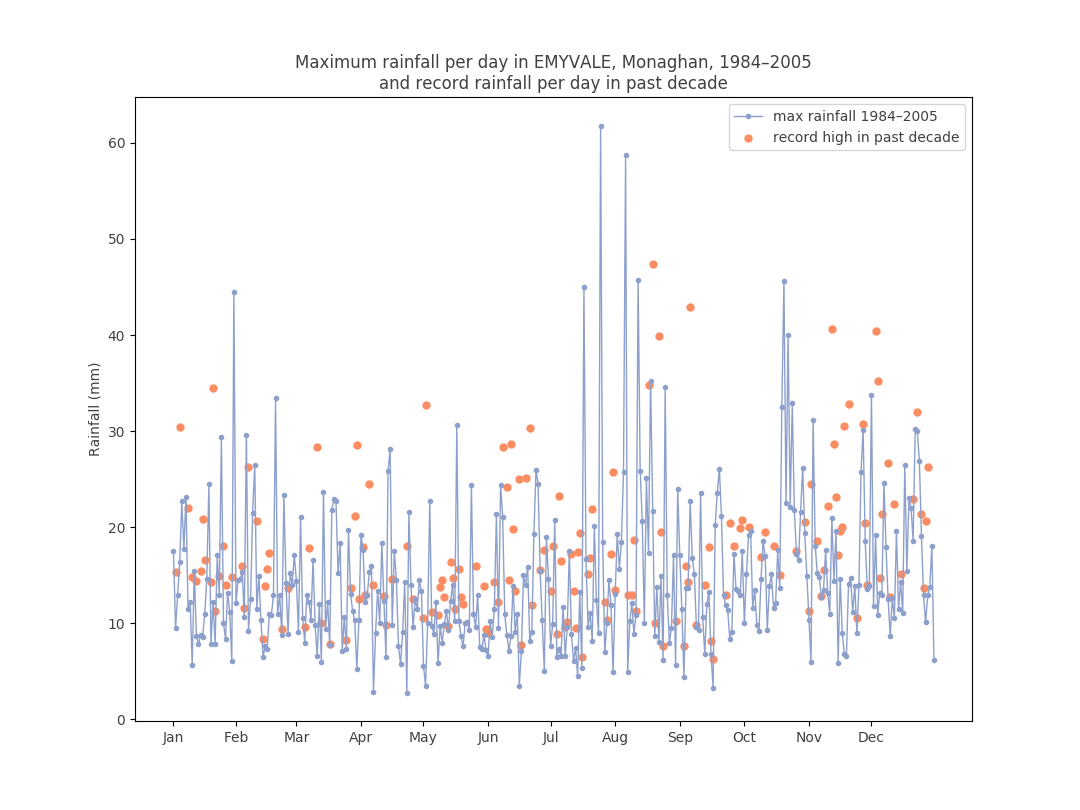

In [6]:
# s is the chosen weather station
s = stations[county.value][station.index]

# construct the path to the data file
fpath = csv_directory / s['filename']

# load the DataFrame
df = load_data(fpath, station=s)

# plot the data
aggregate_and_plot(
    df,
    station=station.value,
    county=county.value,
    timescale=timescale.value,
    agg=agg.value,
)